BFS Tree Path: ['Kadıköy', 'Maltepe', 'Kartal', 'Pendik'] Iterations: 11
BFS Graph Path: ['Kadıköy', 'Maltepe', 'Kartal', 'Pendik'] Iterations: 12
DFS Tree Path: ['Kadıköy', 'Maltepe', 'Kartal', 'Pendik'] Iterations: 4
DFS Graph Path: ['Kadıköy', 'Maltepe', 'Kartal', 'Pendik'] Iterations: 4


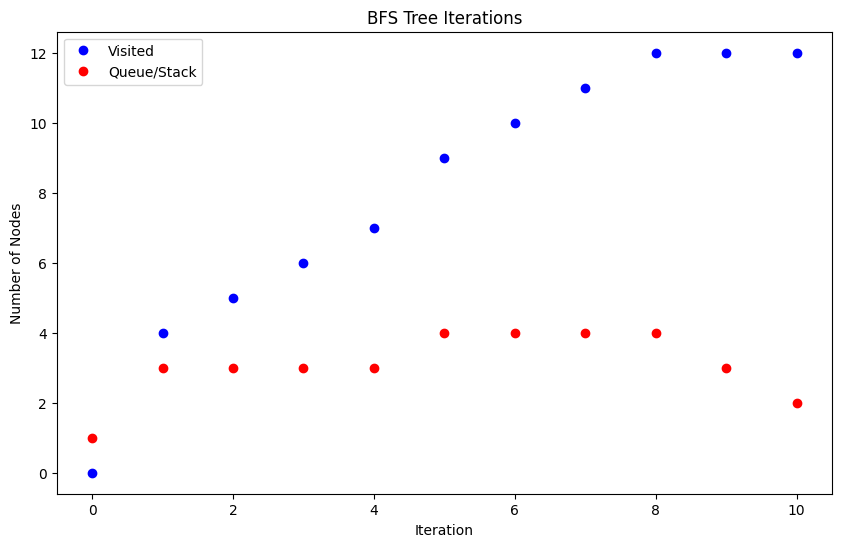

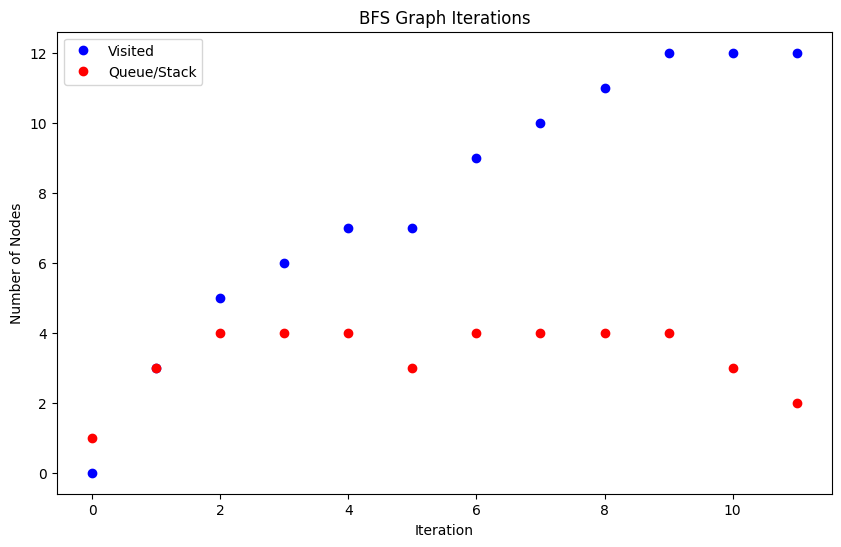

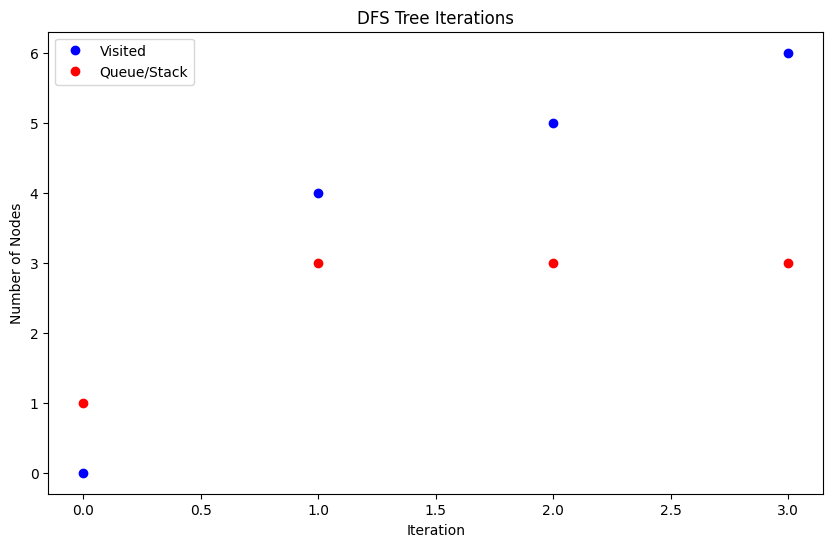

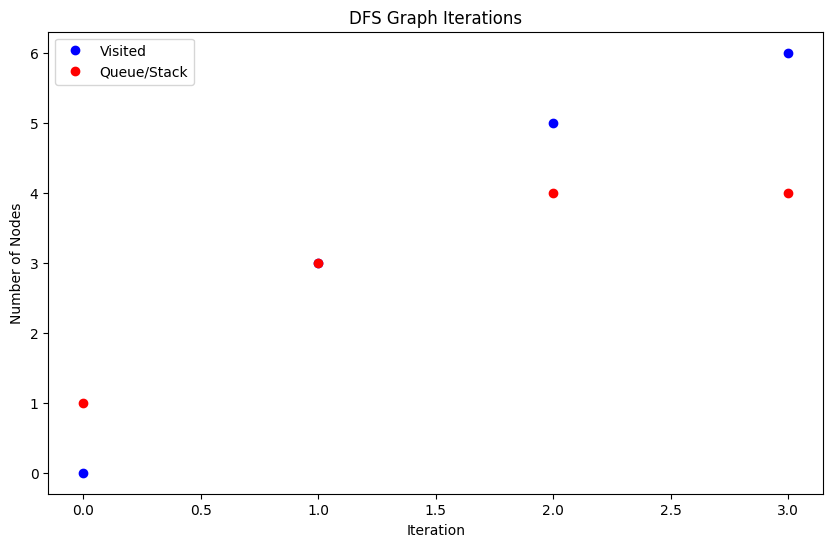


Analysis:
BFS Tree found the path in 11 iterations.
BFS Graph found the path in 12 iterations.
DFS Tree found the path in 4 iterations.
DFS Graph found the path in 4 iterations.

Conclusion:
BFS is generally more suitable for finding the shortest path in an unweighted graph.
DFS may not find the shortest path as it explores as far as possible along each branch before backtracking.


In [5]:
from collections import deque
import matplotlib.pyplot as plt

# İstanbul ilçeleri ve bağlantıları 
istanbul_graph = {
  'Kadıköy': ['Üsküdar', 'Ataşehir', 'Maltepe'],
  'Üsküdar': ['Kadıköy', 'Beşiktaş'],
  'Beşiktaş': ['Üsküdar', 'Şişli', 'Sarıyer'],
  'Şişli': ['Beşiktaş', 'Kağıthane'],
  'Sarıyer': ['Beşiktaş'],
  'Ataşehir': ['Kadıköy', 'Ümraniye'],
  'Maltepe': ['Kadıköy', 'Kartal'],
  'Kartal': ['Maltepe', 'Pendik'],
  'Pendik': ['Kartal'],
  'Ümraniye': ['Ataşehir', 'Çekmeköy'],
  'Çekmeköy': ['Ümraniye']
}

def visualize_iterations(iterations, title):
  fig, ax = plt.subplots(figsize=(10, 6))
  for i, (visited, queue) in enumerate(iterations):
      ax.plot(i, len(visited), 'bo', label='Visited' if i == 0 else "")
      ax.plot(i, len(queue), 'ro', label='Queue/Stack' if i == 0 else "")
  ax.set_xlabel('Iteration')
  ax.set_ylabel('Number of Nodes')
  ax.set_title(title)
  ax.legend()
  plt.show()

def bfs_tree(graph, start, goal):
  visited = set()
  queue = deque([(start, [start])])
  iterations = []
  
  while queue:
      iterations.append((list(visited), list(queue)))
      vertex, path = queue.popleft()
      if vertex == goal:
          return path, iterations
      visited.add(vertex)
      for neighbor in graph[vertex]:
          if neighbor not in visited:
              queue.append((neighbor, path + [neighbor]))
              visited.add(neighbor)
  return None, iterations

def bfs_graph(graph, start, goal):
  visited = set()
  queue = deque([(start, [start])])
  iterations = []
  
  while queue:
      iterations.append((list(visited), list(queue)))
      vertex, path = queue.popleft()
      if vertex == goal:
          return path, iterations
      for neighbor in graph[vertex]:
          if neighbor not in visited:
              queue.append((neighbor, path + [neighbor]))
              visited.add(neighbor)
  return None, iterations

def dfs_tree(graph, start, goal):
  visited = set()
  stack = [(start, [start])]
  iterations = []
  
  while stack:
      iterations.append((list(visited), list(stack)))
      vertex, path = stack.pop()
      if vertex == goal:
          return path, iterations
      visited.add(vertex)
      for neighbor in graph[vertex]:
          if neighbor not in visited:
              stack.append((neighbor, path + [neighbor]))
              visited.add(neighbor)
  return None, iterations

def dfs_graph(graph, start, goal):
  visited = set()
  stack = [(start, [start])]
  iterations = []
  
  while stack:
      iterations.append((list(visited), list(stack)))
      vertex, path = stack.pop()
      if vertex == goal:
          return path, iterations
      for neighbor in graph[vertex]:
          if neighbor not in visited:
              stack.append((neighbor, path + [neighbor]))
              visited.add(neighbor)
  return None, iterations


start_city = 'Kadıköy'
goal_city = 'Pendik'

bfs_tree_path, bfs_tree_iterations = bfs_tree(istanbul_graph, start_city, goal_city)
bfs_graph_path, bfs_graph_iterations = bfs_graph(istanbul_graph, start_city, goal_city)
dfs_tree_path, dfs_tree_iterations = dfs_tree(istanbul_graph, start_city, goal_city)
dfs_graph_path, dfs_graph_iterations = dfs_graph(istanbul_graph, start_city, goal_city)

print("BFS Tree Path:", bfs_tree_path, "Iterations:", len(bfs_tree_iterations))
print("BFS Graph Path:", bfs_graph_path, "Iterations:", len(bfs_graph_iterations))
print("DFS Tree Path:", dfs_tree_path, "Iterations:", len(dfs_tree_iterations))
print("DFS Graph Path:", dfs_graph_path, "Iterations:", len(dfs_graph_iterations))

# Visualize iterations
visualize_iterations(bfs_tree_iterations, "BFS Tree Iterations")
visualize_iterations(bfs_graph_iterations, "BFS Graph Iterations")
visualize_iterations(dfs_tree_iterations, "DFS Tree Iterations")
visualize_iterations(dfs_graph_iterations, "DFS Graph Iterations")


def analyze_results():
  print("\nAnalysis:")
  print("BFS Tree found the path in", len(bfs_tree_iterations), "iterations.")
  print("BFS Graph found the path in", len(bfs_graph_iterations), "iterations.")
  print("DFS Tree found the path in", len(dfs_tree_iterations), "iterations.")
  print("DFS Graph found the path in", len(dfs_graph_iterations), "iterations.")

  # BFS is generally more suitable for finding the shortest path in an unweighted graph
  print("\nConclusion:")
  print("BFS is generally more suitable for finding the shortest path in an unweighted graph.")
  print("DFS may not find the shortest path as it explores as far as possible along each branch before backtracking.")

analyze_results()